In [5]:
#data analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.subplots as sp
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import copy
import itertools

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
#machine learning libraries:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict

#evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import r2_score,f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

In [6]:
#data reading and displaying
df = pd.read_csv("/content/drive/MyDrive/MLoptimization/cedata.csv")
df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,United-States,<=50K


Data Analysis,Exploration and Preprocessing



In [7]:
df.shape

(32561, 14)

In [8]:
#function to replace missing data
df.replace("?", pd.NA, inplace=True)


for column in df.columns:
    if df[column].dtype == 'object':
        most_common_value = df[column].mode()[0]
        df[column].fillna(most_common_value, inplace=True)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,United-States,<=50K


In [9]:
#function to count duplicate values
df.duplicated().sum()

24

In [10]:
#function to drop duplicate values
df.drop_duplicates(inplace=True)

In [11]:
#to count missing values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [12]:
#function for to identify datatypes
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [13]:
#shape of data
df.shape

(32537, 14)

In [14]:
#relationship values count
df["relationship"].value_counts()

relationship
Husband           13187
Not-in-family      8292
Own-child          5064
Unmarried          3445
Wife               1568
Other-relative      981
Name: count, dtype: int64

In [15]:
#change values of sex variable
binary_columns = ['sex']
for column in binary_columns:
    df[column]=df[column].replace({"Male":0,"Female":1})

df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,1,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,1,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,1,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,1,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,1,0,3900,40,United-States,<=50K


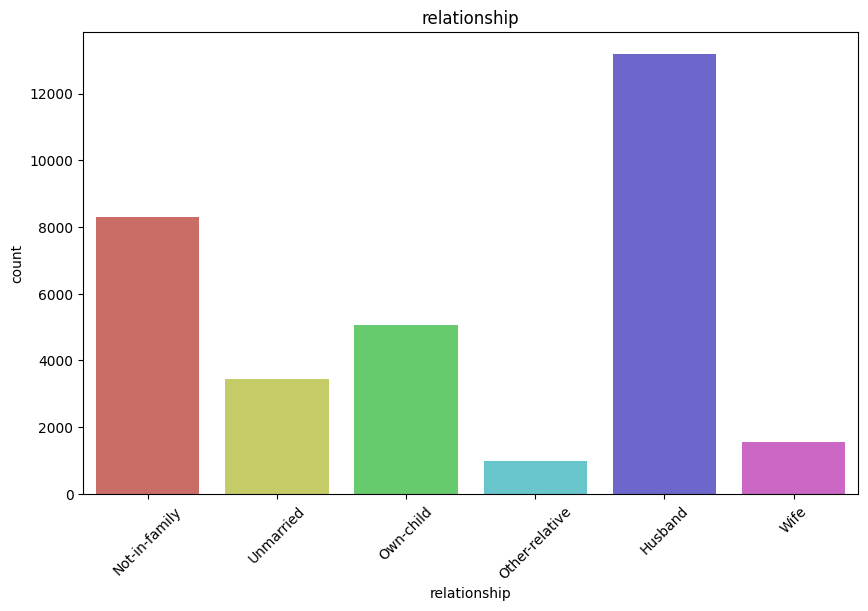

In [16]:
# relationship column
plt.figure(figsize=(10,6))
sns.countplot(x='relationship', data=df, palette='hls')
plt.title('relationship')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

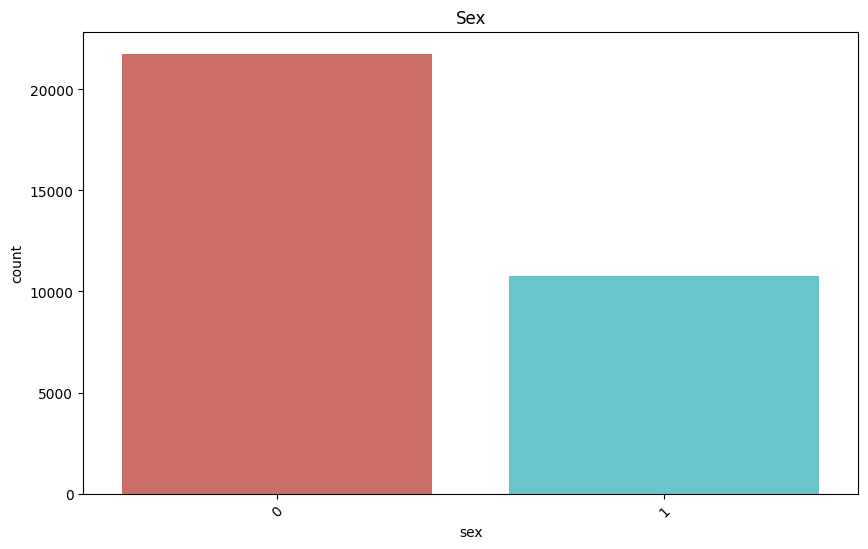

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x='sex', data=df, palette='hls')
plt.title('Sex')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

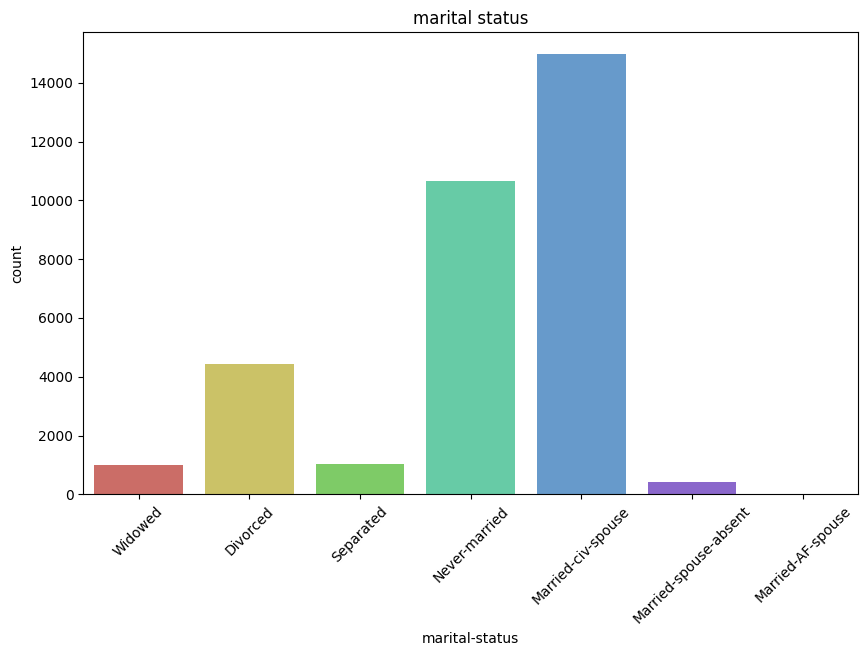

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='marital-status', data=df, palette='hls')
plt.title('marital status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()



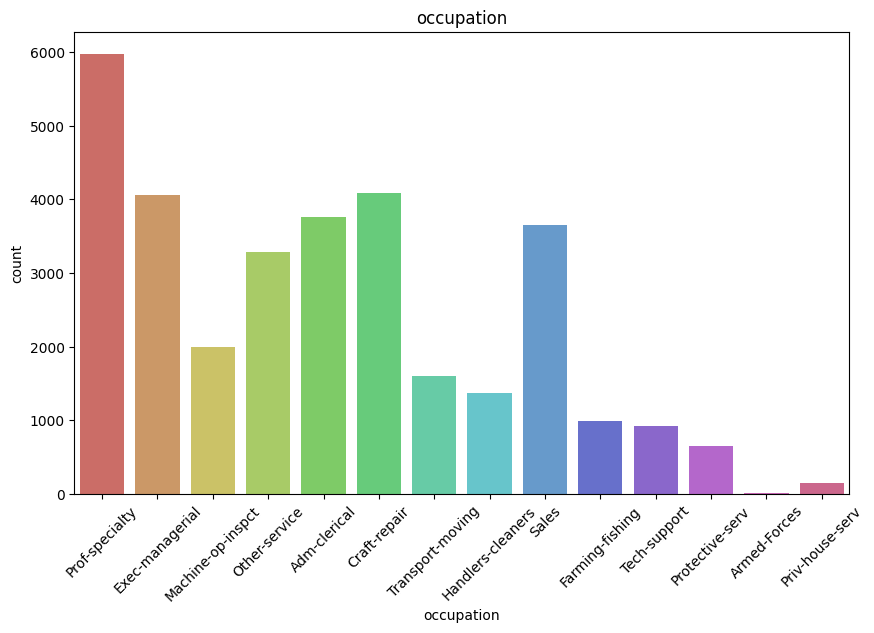

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='occupation', data=df, palette='hls')
plt.title('occupation')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


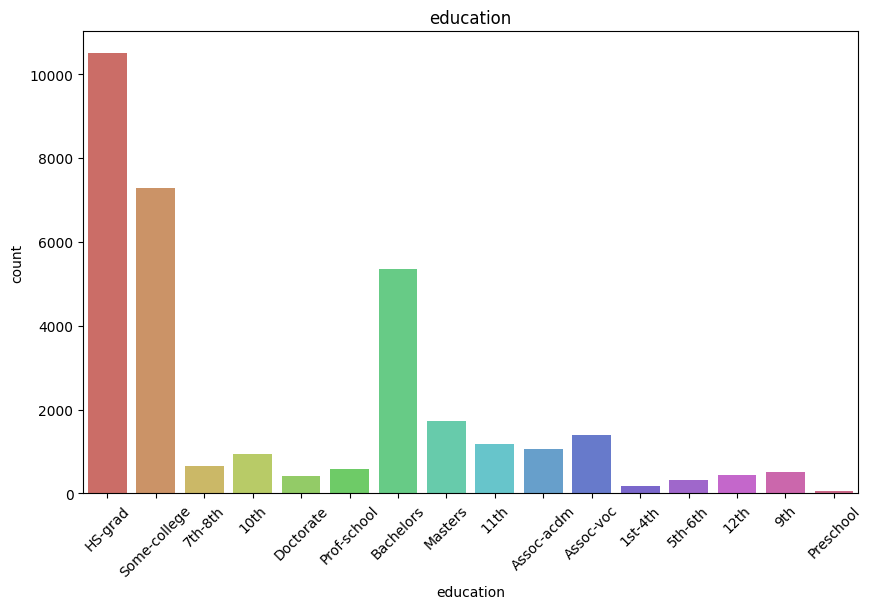

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='education', data=df, palette='hls')
plt.title('education')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


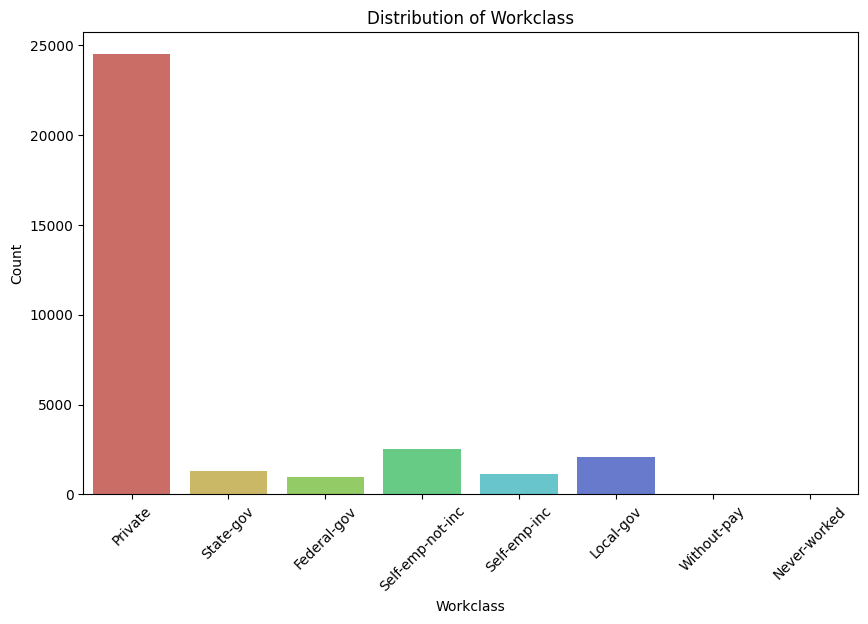

In [ ]:
# Plot the distribution of the 'workclass' variable
plt.figure(figsize=(10, 6))  # Adjust the figure size for better readability
sns.countplot(x='workclass', data=df, palette='hls')
plt.title('Distribution of Workclass')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

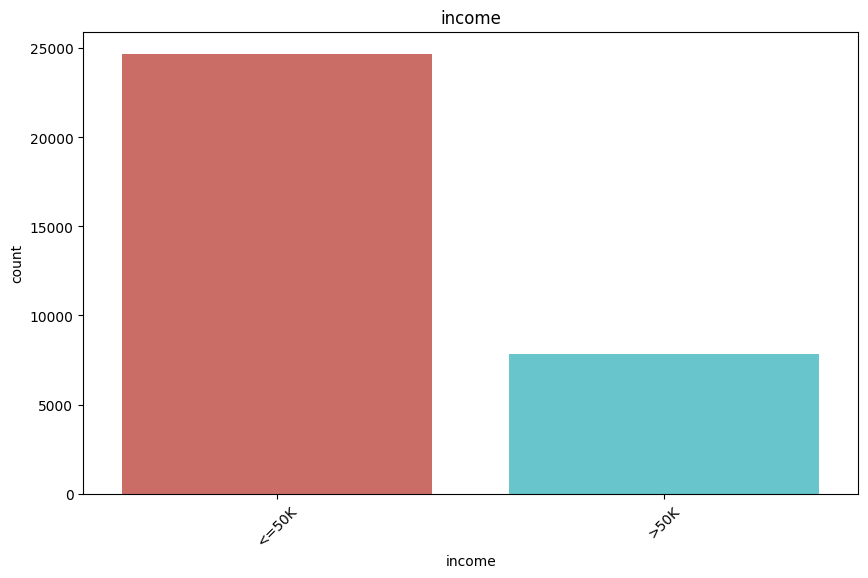

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='income', data=df, palette='hls')
plt.title('income')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
#data encoding
from sklearn.preprocessing import LabelEncoder
categorical_features=["education","workclass","marital-status","occupation","relationship","native-country"]
numerical_features=["age","fnlwgt","education-num","sex","capital-gain","capital-loss","hours-per-week"]
for column in categorical_features:
    l_encoder=LabelEncoder()
    df[column]=l_encoder.fit_transform(df[column])

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,90,3,77053,11,9,6,9,1,1,0,4356,40,38,<=50K
1,82,3,132870,11,9,6,3,1,1,0,4356,18,38,<=50K
2,66,3,186061,15,10,6,9,4,1,0,4356,40,38,<=50K
3,54,3,140359,5,4,0,6,4,1,0,3900,40,38,<=50K
4,41,3,264663,15,10,5,9,3,1,0,3900,40,38,<=50K


In [ ]:
X = df.drop("income", axis=1)
y = df["income"]

X_train, X_test, y_train, y_test = train_test_split(
    X , y ,
    test_size=0.2,
    random_state=42
)

In [ ]:
#converting data into scaler form
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [ ]:
X_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.175224,0.813869,-1.183710,0.178349,-0.424522,-0.405198,-0.531324,-0.905090,-0.703910,-0.147221,-0.217763,0.772045,0.260014
1,-0.703437,-0.085634,0.211972,-0.339700,1.134104,-0.405198,1.227526,-0.905090,-0.703910,-0.147221,-0.217763,-0.035693,0.260014
2,0.321668,0.813869,0.073929,0.178349,-0.424522,-0.405198,0.222469,-0.905090,-0.703910,-0.147221,-0.217763,3.033711,-0.071527
3,0.541333,-0.085634,0.886719,-0.598725,0.354791,1.582909,-0.028796,-0.284310,1.420635,-0.147221,-0.217763,-0.035693,0.260014
4,-0.630215,-0.085634,-0.839690,1.214447,-0.034865,-0.405198,-1.536382,2.198809,1.420635,-0.147221,-0.217763,-0.035693,0.260014


In [ ]:
#
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with all the features: 0.8285


In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([0.15732735, 0.10929197, 0.08656098, 0.0802441 , 0.0794921 ,
       0.07733611, 0.07529457, 0.07102901, 0.06971263, 0.06567157,
       0.0523742 , 0.04615444, 0.02951096])

In [ ]:
from sklearn import preprocessing
X = df.drop(['income','native-country'], axis=1)
y = df['income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


categorical = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'sex']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with the first 13 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with the first 13 features: 0.8279


In [ ]:
clf=pd.DataFrame(y_pred).value_counts()

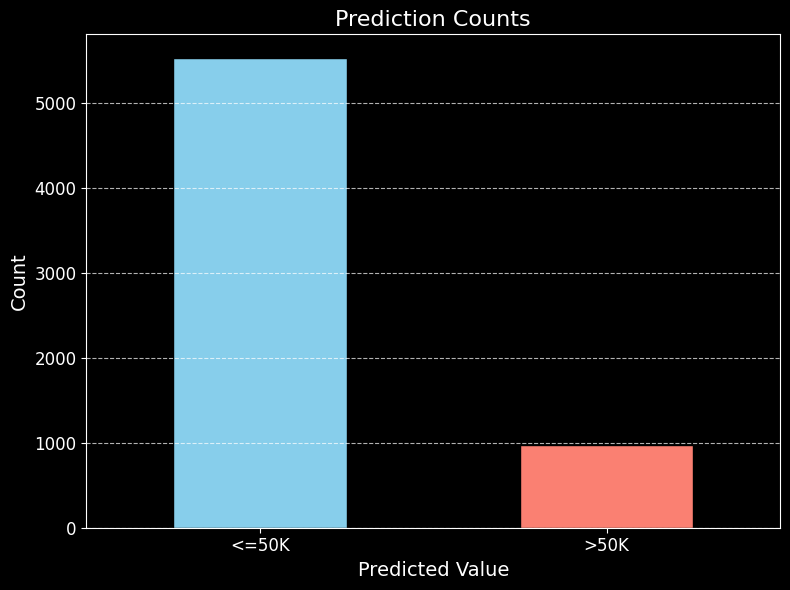

In [ ]:
clf = pd.DataFrame(y_pred, columns=["Predicted"])
value_counts = clf["Predicted"].value_counts()

plt.figure(figsize=(8, 6))
colors = ['skyblue', 'salmon']
value_counts.plot(kind='bar', color=colors, edgecolor='black')
plt.xlabel('Predicted Value', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Prediction Counts', fontsize=16)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBRFClassifier
#from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier
#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
#from imblearn.over_sampling import RandomOverSampler
from sklearn.calibration import calibration_curve



from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
#function to evaluate the difference metrics of a clssifier
def model_eval(model, X_train, y_train, X_test, y_test):
  print('\n')
  print(f'{type(model).__name__} Stats')
  print('Train Accuracy Score: ' + str(model.score(X_train, y_train)*100))
  y_pred = model.predict(X_test)
  print('Test Accuracy Score: ' + str(accuracy_score(y_test, y_pred)*100))
  print(classification_report(y_test, y_pred))
  labels = ['<=50', '>50']
  cm = confusion_matrix(y_test, y_pred)
  plt.figure(figsize = (8,8))
  sns.heatmap(cm, annot = True, fmt='', xticklabels = labels, yticklabels = labels)
  plt.title(f'{type(model).__name__} Confusion Matrix')
  plt.show()



LogisticRegression Stats
Train Accuracy Score: 82.46186945330209
Test Accuracy Score: 82.6060233558697
              precision    recall  f1-score   support

       <=50K       0.85      0.94      0.89      4988
        >50K       0.69      0.46      0.55      1520

    accuracy                           0.83      6508
   macro avg       0.77      0.70      0.72      6508
weighted avg       0.81      0.83      0.81      6508



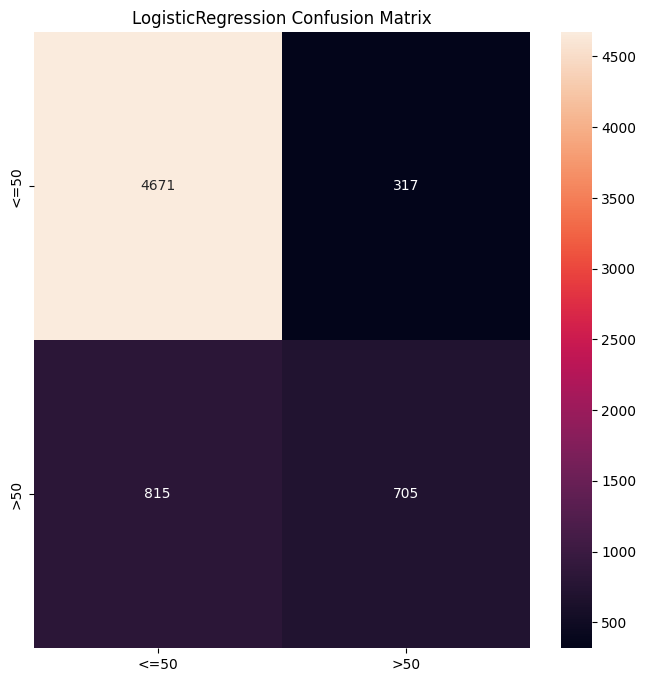



RandomForestClassifier Stats
Train Accuracy Score: 99.99615813131507
Test Accuracy Score: 85.87891825445605
              precision    recall  f1-score   support

       <=50K       0.89      0.92      0.91      4988
        >50K       0.72      0.64      0.68      1520

    accuracy                           0.86      6508
   macro avg       0.81      0.78      0.79      6508
weighted avg       0.85      0.86      0.86      6508



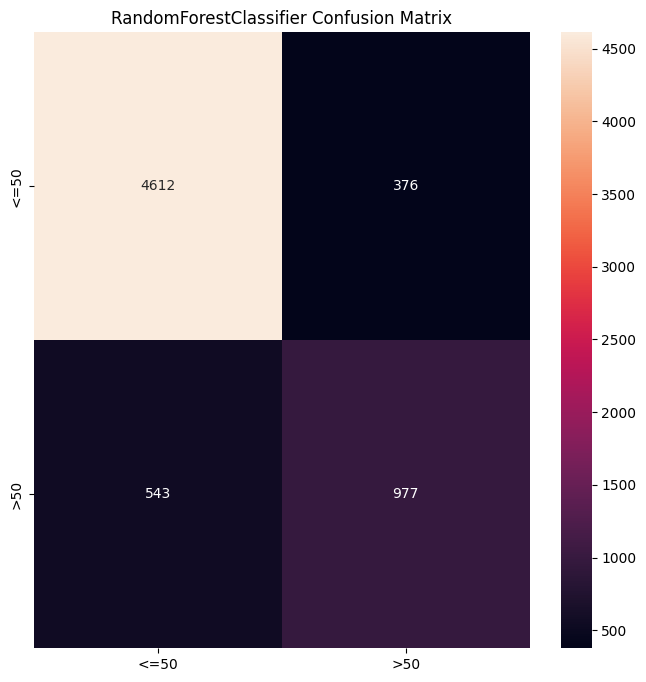



DecisionTreeClassifier Stats
Train Accuracy Score: 99.99615813131507
Test Accuracy Score: 81.00799016594961
              precision    recall  f1-score   support

       <=50K       0.88      0.86      0.87      4988
        >50K       0.59      0.63      0.61      1520

    accuracy                           0.81      6508
   macro avg       0.74      0.75      0.74      6508
weighted avg       0.82      0.81      0.81      6508



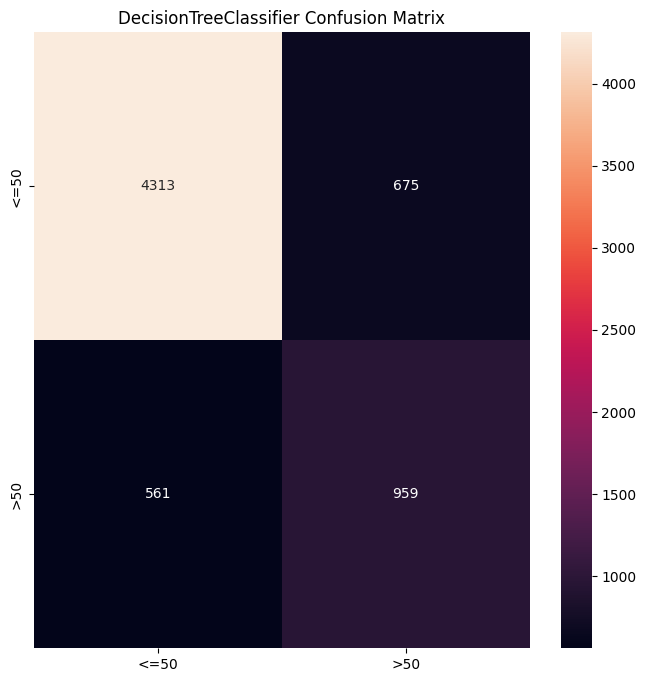



KNeighborsClassifier Stats
Train Accuracy Score: 87.66375965269508
Test Accuracy Score: 83.37430854333128
              precision    recall  f1-score   support

       <=50K       0.88      0.90      0.89      4988
        >50K       0.66      0.61      0.63      1520

    accuracy                           0.83      6508
   macro avg       0.77      0.75      0.76      6508
weighted avg       0.83      0.83      0.83      6508



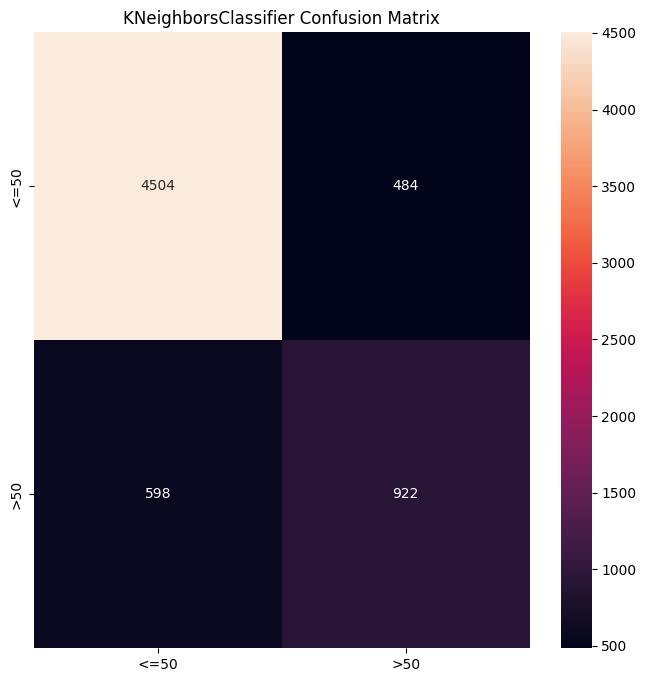



SVC Stats
Train Accuracy Score: 85.49310384571055
Test Accuracy Score: 85.09526736324524
              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      4988
        >50K       0.74      0.56      0.64      1520

    accuracy                           0.85      6508
   macro avg       0.81      0.75      0.77      6508
weighted avg       0.84      0.85      0.84      6508



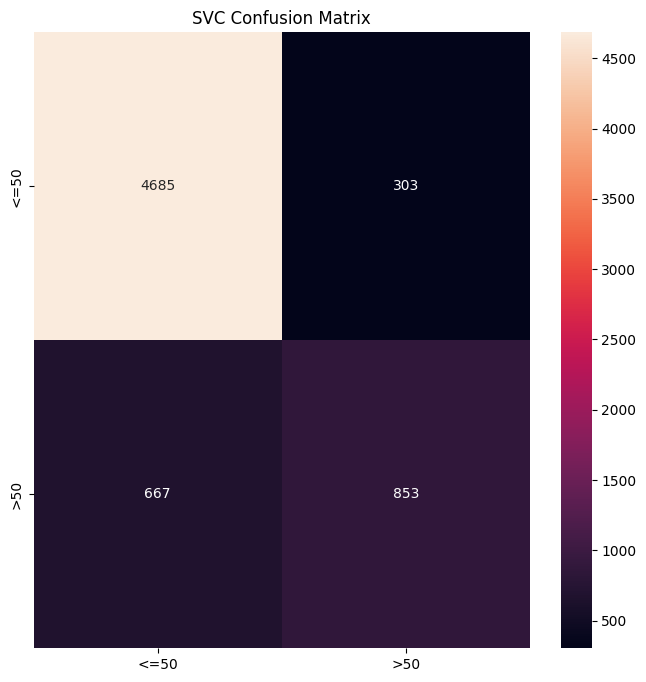

In [ ]:
LR = LogisticRegression().fit(X_train, y_train)
RFC = RandomForestClassifier().fit(X_train, y_train)
DTC = DecisionTreeClassifier().fit(X_train, y_train)
KNN = KNeighborsClassifier().fit(X_train, y_train)
SVM = SVC().fit(X_train, y_train)
#GBC = GradientBoostingClassifier().fit(X_train, y_train)
#XGBRF = XGBRFClassifier().fit(X_train, y_train)
#LGB = LGBMClassifier().fit(X_train, y_train)
#CBC = CatBoostClassifier().fit(X_train, y_train, verbose=0)
#Ada = AdaBoostClassifier().fit(X_train, y_train)
#BC = BaggingClassifier().fit(X_train, y_train)
#model_list = [LR, RFC, DTC, KNN, SVM, GBC, LGB, Ada, BC]
model_list = [LR, RFC, DTC, KNN, SVM]
for model in model_list:
  model_eval(model, X_train, y_train, X_test, y_test)

Optimization Grid Search

In [ ]:
import copy
import itertools

In [ ]:
#for optimization purposes
class GridSearch:


  def __init__(self, model, parameter_grid):
    self.model = model
    self.parameter_grid = parameter_grid
    self.best_model_ = None
    self.best_params_ = dict()

  def generate_permutations(self):
    keys = self.parameter_grid.keys()
    vals = self.parameter_grid.values()
    for instance in itertools.product(*vals):
        yield dict(zip(keys, instance))

  def fit_test(self, X_train, y_train, X_test, y_test):
    dummy = list(self.generate_permutations())
    keys = list(dummy[0].keys())
    best_score = 0.0
    scores = []
    for para in dummy:
      self.model.set_params(**para)
      self.model.fit(X_train, y_train)
      score = self.model.score(X_test, y_test)
      scores.append(score)
      if score >= best_score:
        best_score = score
        self.best_params_ = self.model.get_params(deep=False)
        self.best_model_ = copy.deepcopy(self.model)
    self.plot_curve(scores)

  def plot_curve(self,scores):
    fig = px.line(
        pd.DataFrame({
            'Iterations': range(len(scores)),
            'Scores': scores
        }),
        x='Iterations',
        y='Scores',
        template="plotly_dark",
        width=800, height=500)
    fig.update_layout(title={
        'text': f'{type(self.model).__name__} Model Accuracy Graph',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
    fig.show(renderer="svg")


In [ ]:
! pip install -U kaleido

In [ ]:
import kaleido

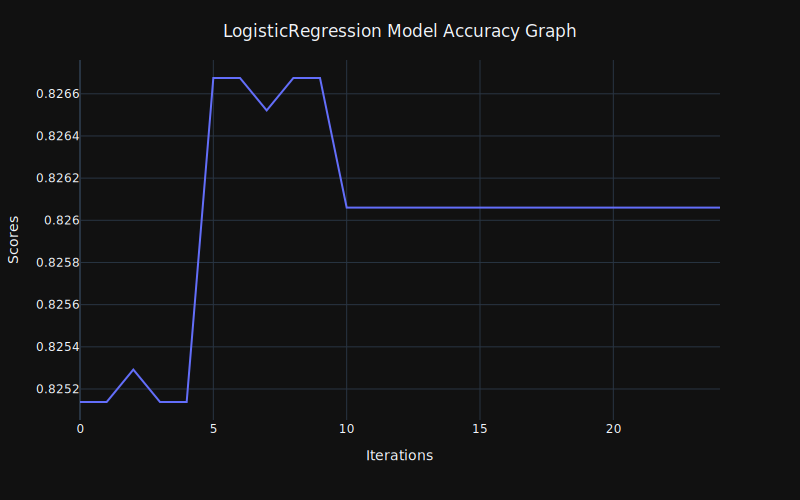

In [ ]:
logistic_parameter_grid = {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    }
logistic_grid_search = GridSearch(LogisticRegression(), logistic_parameter_grid)
logistic_grid_search.fit_test(X_train, y_train, X_test, y_test)


In [ ]:
LR = logistic_grid_search.best_model_



LogisticRegression Stats
Train Accuracy Score: 82.44266010987744
Test Accuracy Score: 82.66748617086662
              precision    recall  f1-score   support

       <=50K       0.85      0.94      0.89      4988
        >50K       0.69      0.47      0.56      1520

    accuracy                           0.83      6508
   macro avg       0.77      0.70      0.72      6508
weighted avg       0.81      0.83      0.81      6508



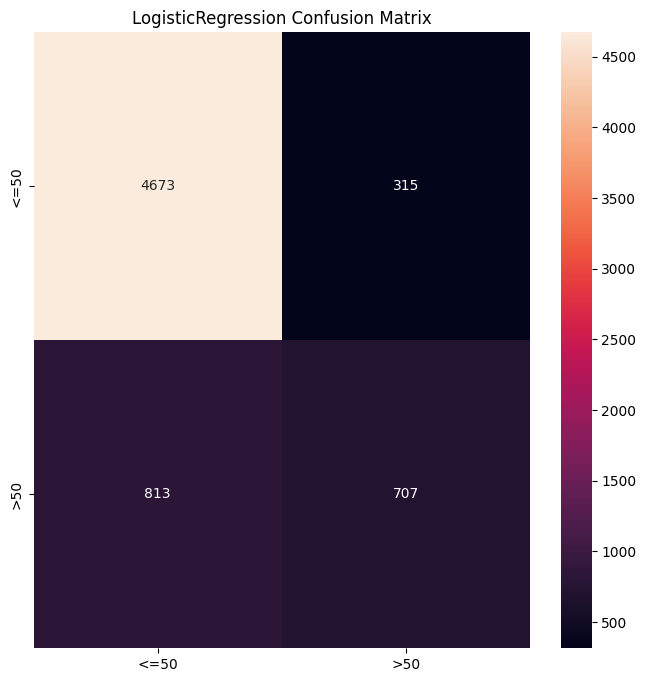

In [ ]:
model_eval(LR, X_train, y_train, X_test, y_test)

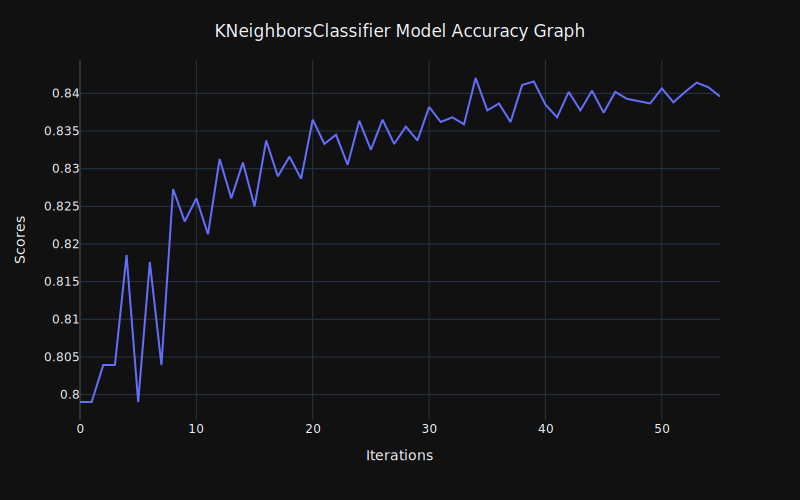

In [ ]:
KNN_parameter_grid = {
        'n_neighbors': range(1,15),
        'metric': ['minkowski', 'manhattan'],
        'weights': ['uniform', 'distance']
    }
KNN_grid_search = GridSearch(KNeighborsClassifier(), KNN_parameter_grid)
KNN_grid_search.fit_test(X_train, y_train, X_test, y_test)


In [ ]:
KNN = KNN_grid_search.best_model_



KNeighborsClassifier Stats
Train Accuracy Score: 86.53809212801107
Test Accuracy Score: 84.2040565457898
              precision    recall  f1-score   support

       <=50K       0.88      0.91      0.90      4988
        >50K       0.68      0.60      0.64      1520

    accuracy                           0.84      6508
   macro avg       0.78      0.76      0.77      6508
weighted avg       0.84      0.84      0.84      6508



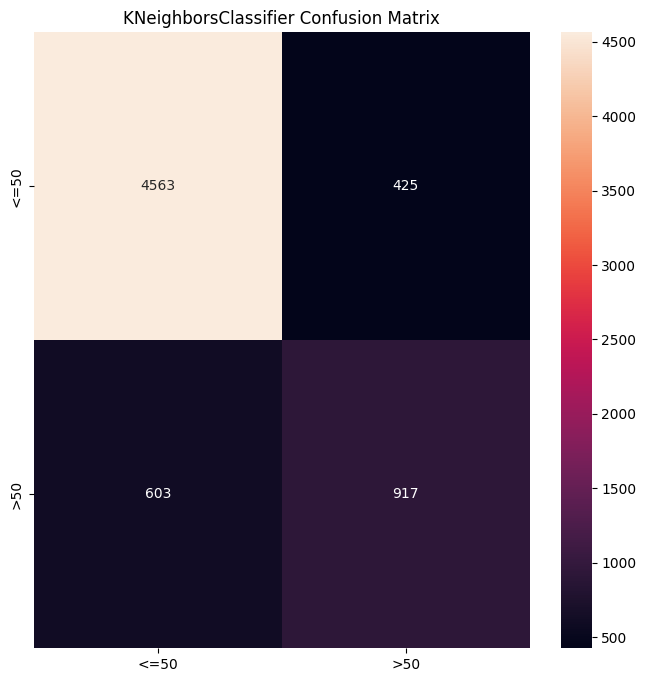

In [ ]:
model_eval(KNN, X_train, y_train, X_test, y_test)